## Random forest

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.naive_bayes import GaussianNB
import pickle

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
with open('census.pkl', 'rb') as f:
    x_census_training, y_census_training, x_census_test, y_census_test = pickle.load(f)

In [4]:
x_census_training.shape, y_census_training.shape, x_census_test.shape, y_census_test.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [18]:
random_forest = RandomForestClassifier(n_estimators= 100, 
                                       criterion= 'entropy',
                                       random_state= 0)
random_forest.fit(x_census_training,y_census_training)

RandomForestClassifier(criterion='entropy', random_state=0)

In [19]:
prediction = random_forest.predict(x_census_test)
prediction

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [20]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_test,prediction)

0.8507676560900717

0.8507676560900717

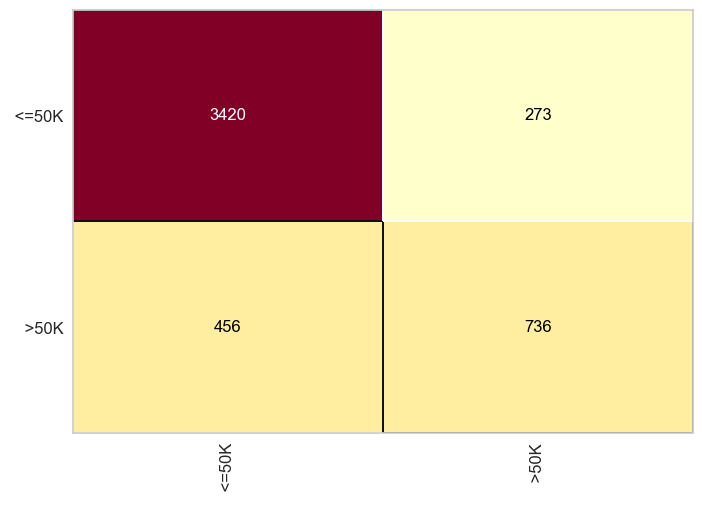

In [21]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix = ConfusionMatrix(random_forest)
confusion_matrix.fit(x_census_training,y_census_training)
confusion_matrix.score(x_census_test,y_census_test)

In [22]:
print(classification_report(y_census_test,prediction))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885

